# Regresión Lineal en Python

En este notebook vamos a aprender a implementar regresiones utilizando Scikit-Learn en Python.
Para esto vamos a utilizar un dataset compuesto por características de distintos vinos. El dataset puede encontrarse en este [link](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as seabornInstance
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
from sklearn.preprocessing import PolynomialFeatures

dataset = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=14G9ZOBJcVVT0d3ozPRNQBOZUr_qL-iXk'
)

dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


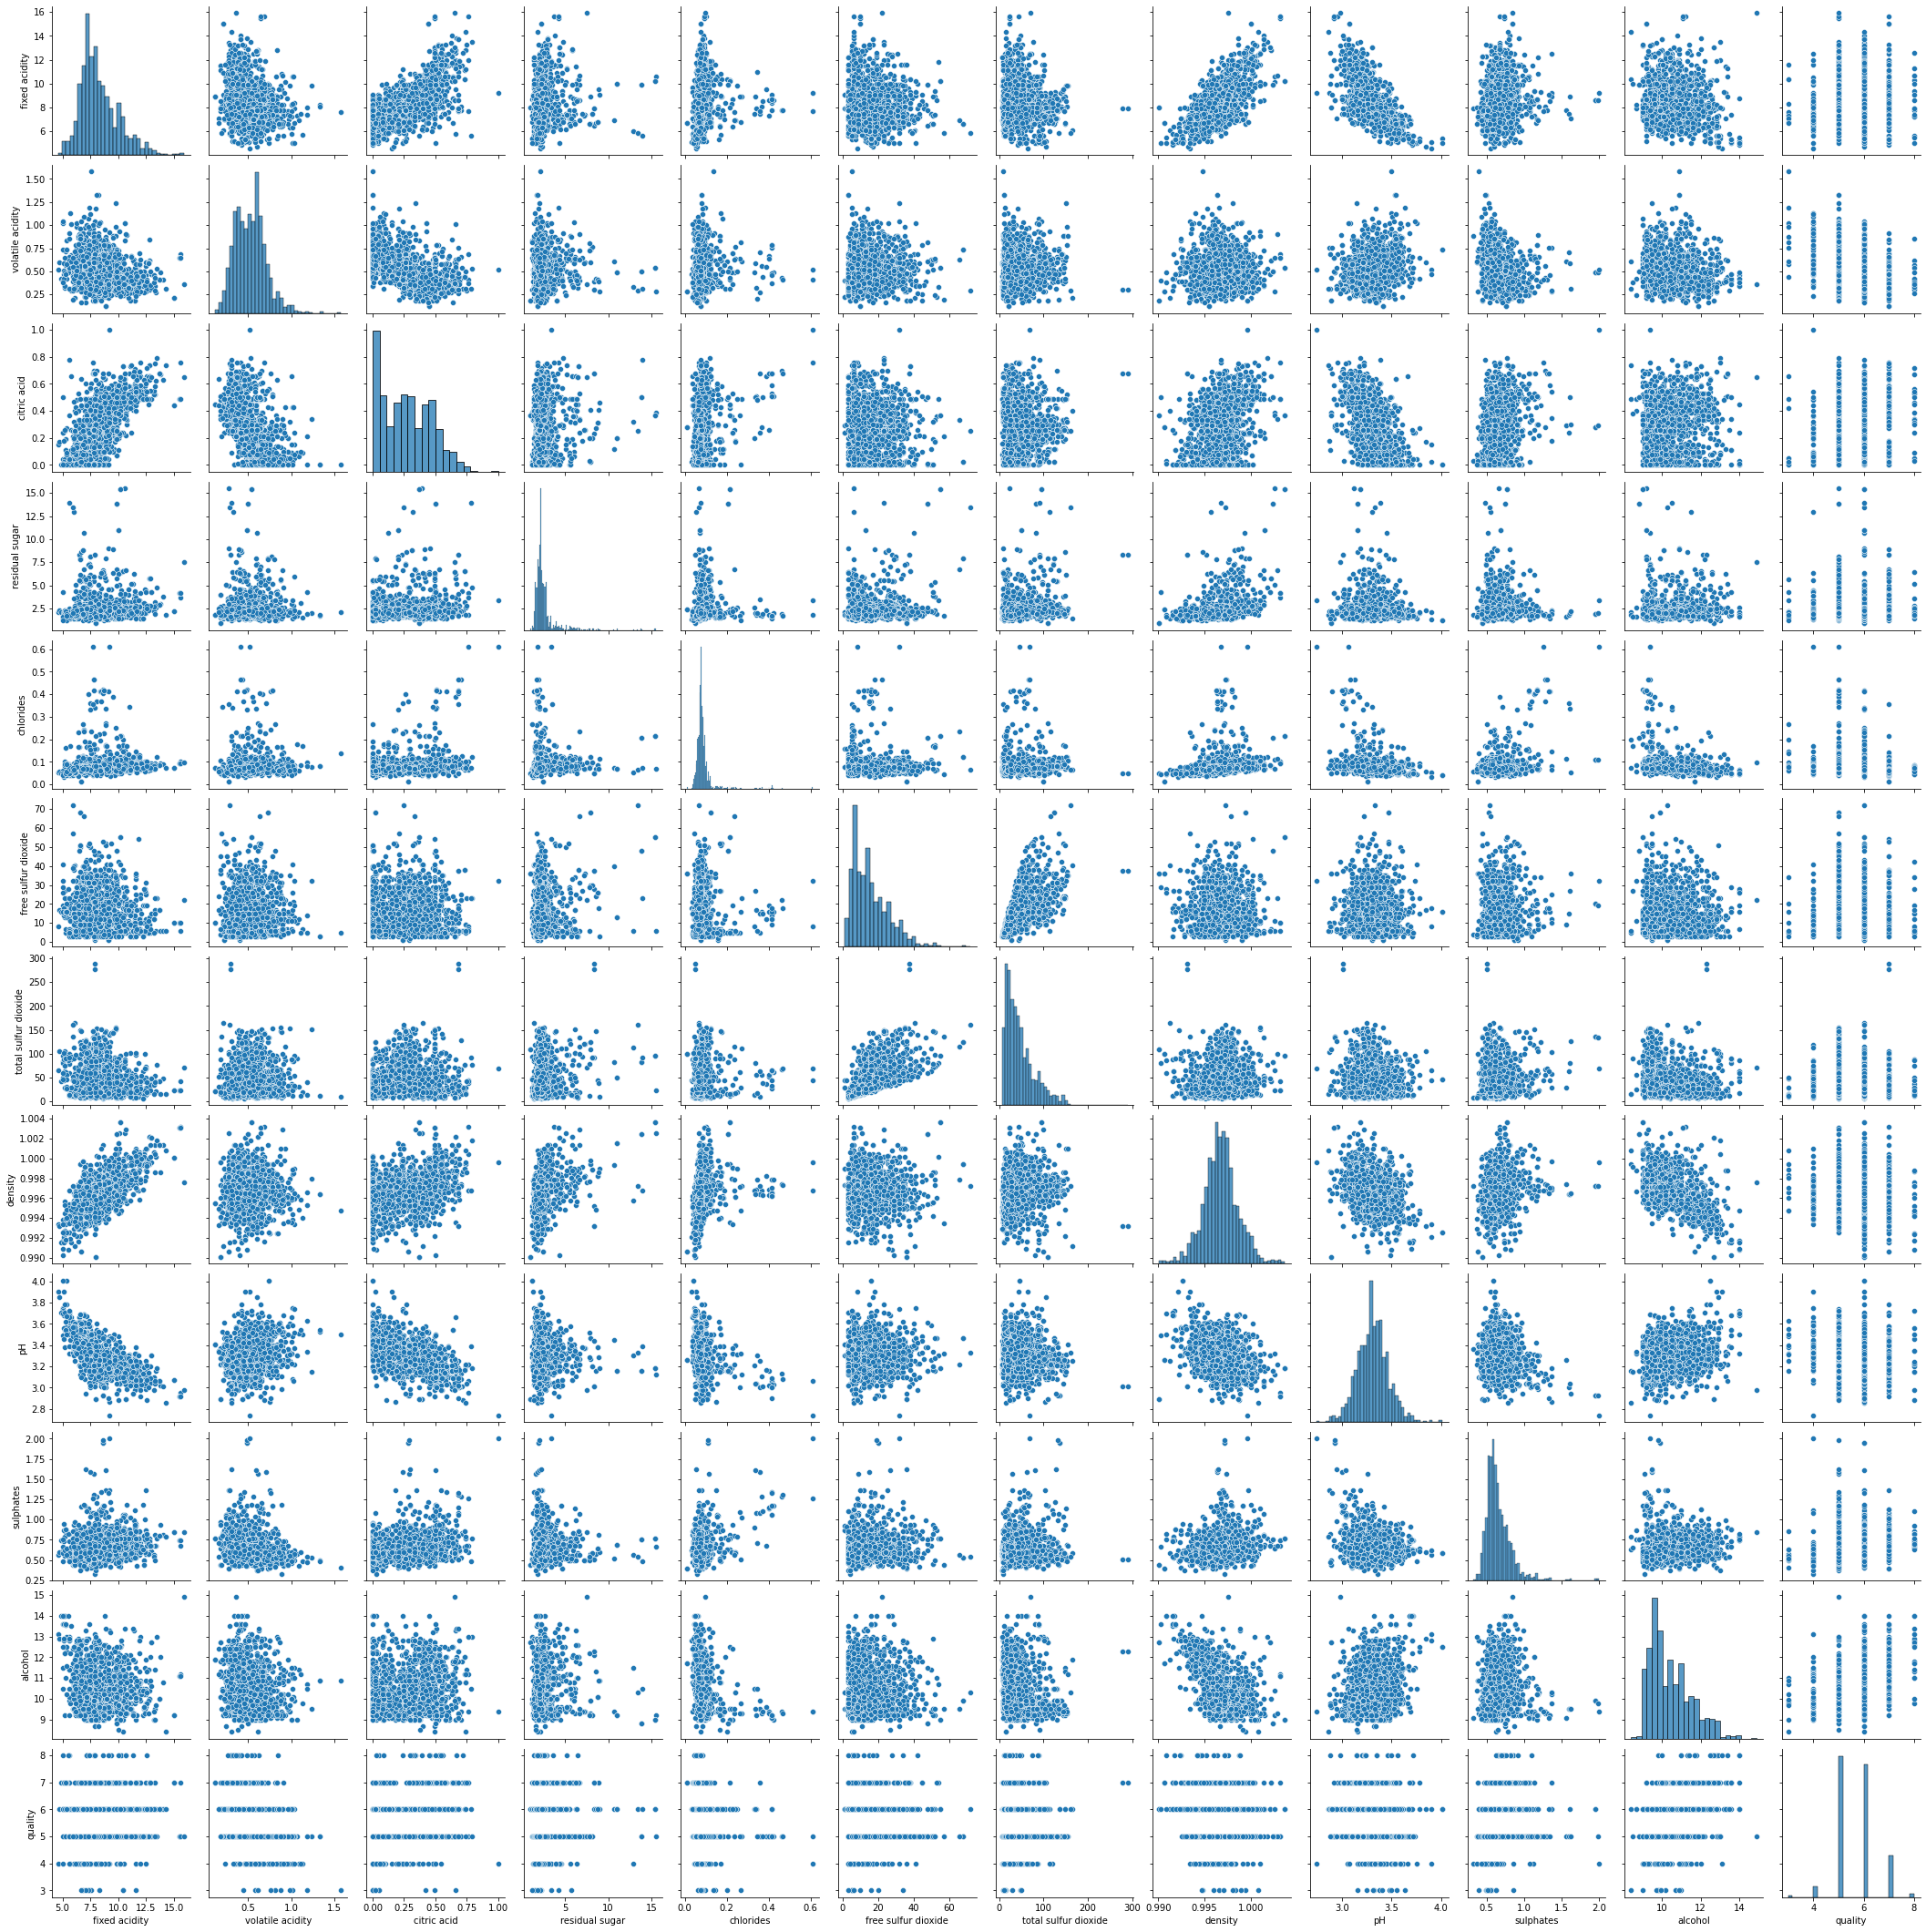

In [6]:
# Analizamos la correlación de las variables de a pares
seabornInstance.pairplot(dataset)

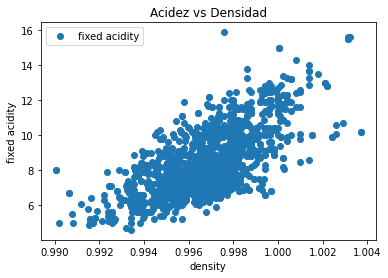

In [7]:
# Nos quedamos con la siguiente correlación
dataset.plot(x='density', y='fixed acidity', style='o')
plt.title('Acidez vs Densidad')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.show()

<AxesSubplot:xlabel='density', ylabel='Count'>

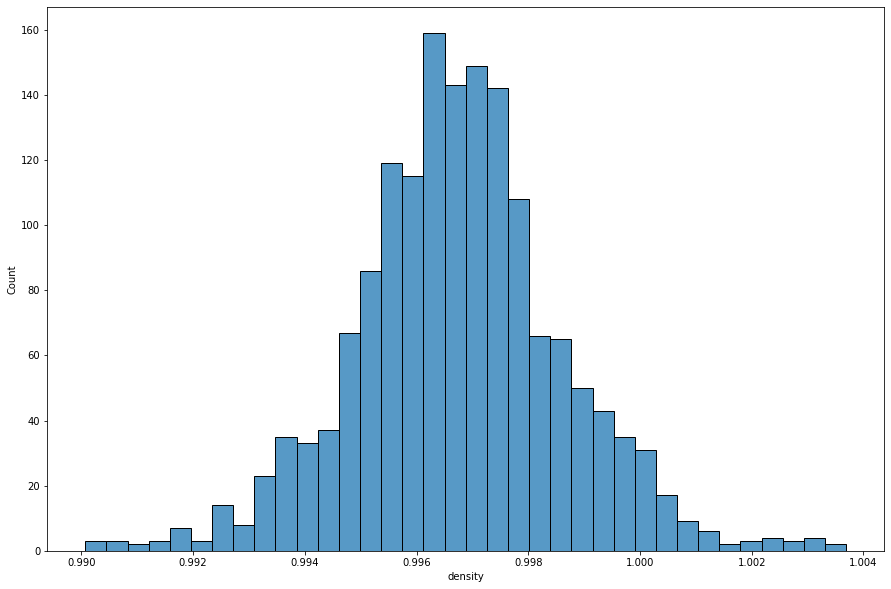

In [8]:
# Graficamos la distribución de los valores
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.histplot(dataset['density'])

Determinamos los _atributos_ y los _labels_. Los atributos son las variables independientes, mientras que los labels son las variables que queremos determinar.
Como queremos determinar la Acidez en base a la Densidad, los valores de Densidad son nuestros atributos que se reflejan en la variable X y los valores de Acidez son nuestros labels, representados por la variable Y.

#### $Y = B_{1} * X + B_{0}$

In [9]:
X = dataset['density'].values.reshape(-1, 1)
Y = dataset['fixed acidity'].values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, Y)  # Entrenamos el algoritmo

LinearRegression()

La regresión lineal nos determina el valor de los parámetros **B1** y **B0**. **B1** representa la pendiente de la recta y **B0** la ordenada al origen.

In [10]:
# Imprimimos el valor de B1
print(regressor.coef_)

[[616.28450984]]


In [11]:
# Imprimimos el valor de B0
print(regressor.intercept_)

[-605.95990133]


#### Significado de los coeficientes estimados

Teóricamente, el valor de la <b>ordenada al origen</b>, es decir, -605.95990133 es el valor de Acidez de un vino con Densidad cero, por lo que su interpretación individual no tiene sentido. La <b>pendiente</b> de la recta estimada es 616.28450984, es decir, que por cada aumento de un punto en la tasa de Densidad, la Acidez sube 616 puntos <b>en promedio</b>.

#### Predicciones

Ahora que entrenamos el algoritmo, es hora de realizar nuestra predicción

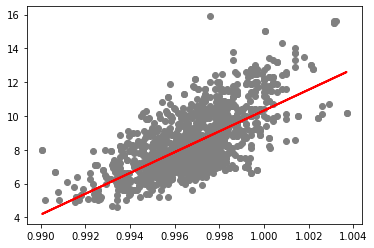

In [12]:
Y_pred = regressor.predict(X)

plt.scatter(X, Y, color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

Vemos que el algoritmo resulta en una recta que refleja la relación entre ambas variables.

### Errores

Calculamos el error del modelo

In [13]:
dataset = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': Y_pred.flatten()})
dataset

,Actual,Predicted
0,7.4,8.968783
1,7.8,8.352498
2,7.8,8.475755
3,11.2,9.092039
4,7.4,8.968783
...,...,...
1594,6.2,7.181558
1595,5.9,7.317140
1596,6.3,7.699236
1597,5.9,7.532840


**1) Error Cuadrático Medio (Mean Squared Error)**

Medida de qué tan cercana es la recta de regresión a los puntos que representan los datos. Mientras más chico más cerca está nuestro modelo de los datos reales. Al ser un valor elevado al cuadrado, es sensible a valores de diferencias grandes.

In [14]:
print("MSE: " + str(metrics.mean_squared_error(Y, Y_pred, squared=True)))

MSE: 1.6774843637798658


**2) Raíz del Error Cuadrático Medio (Root Mean Squared Error)**

Tiene las mismas unidades que los valores representados en el eje vertical. Es la distancia de un punto hasta la recta de regresión, medida en línea recta. Mide el desvío estándar (cuánto se alejan los valores de la media).

In [15]:
print("RMSE: " + str(metrics.mean_squared_error(Y, Y_pred, squared=False)))

RMSE: 1.2951773483889633


### Gráfico de Residuos vs Predichos

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

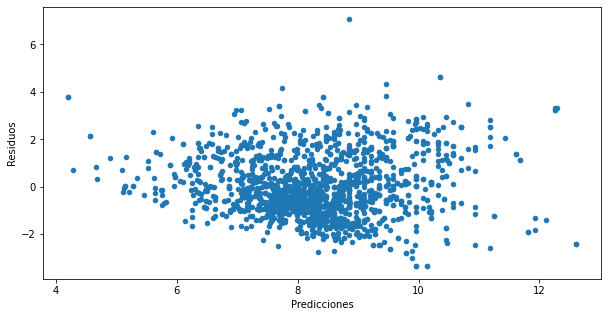

In [16]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame({"Predicciones": Y_pred.flatten(), "true": Y.flatten()})
preds["Residuos"] = preds["true"] - preds["Predicciones"]
preds.plot(x="Predicciones", y="Residuos", kind="scatter")

Observamos el gráfico de Residuos vs Predichos para ver si tiene forma de "nube sin esctructura". Tiene forma de nube, pero presenta un agrupamiento en el centro lo que le da cierta estructura. Sin embargo, el agrupamiento se presenta en valores cercanos a 0, por lo que nuestro modelo presenta buenos resultados.

### Regresión Polinomial

Lo que primero debemos hacer es crear nuestras nuevas variables polinomiales. Vamos a crear $X_{2}$ = density<sup>2</sup>

In [17]:
# Polynomial features permite generar nuevas features mediante la multiplicación de las features actuales
polynomial_features = PolynomialFeatures(degree=2)

In [18]:
df = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=14G9ZOBJcVVT0d3ozPRNQBOZUr_qL-iXk'
)
df = df.sort_values(by=['density'])

print("Density: \n")
print(df['density'].values.reshape(-1, 1))
print()

print("Volatile Acidity: \n")
print(df['volatile acidity'].values.reshape(-1, 1))
print()

# Por ejemplo
x_poly_2 = polynomial_features.fit_transform(df[['density', 'volatile acidity']].values)
x_poly_2

Density: 

[[0.99007]
 [0.99007]
 [0.9902 ]
 ...
 [1.0032 ]
 [1.00369]
 [1.00369]]

Volatile Acidity: 

[[0.18 ]
 [0.18 ]
 [0.4  ]
 ...
 [0.685]
 [0.54 ]
 [0.54 ]]



array([[1.        , 0.99007   , 0.18      , 0.9802386 , 0.1782126 ,
        0.0324    ],
       [1.        , 0.99007   , 0.18      , 0.9802386 , 0.1782126 ,
        0.0324    ],
       [1.        , 0.9902    , 0.4       , 0.98049604, 0.39608   ,
        0.16      ],
       ...,
       [1.        , 1.0032    , 0.685     , 1.00641024, 0.687192  ,
        0.469225  ],
       [1.        , 1.00369   , 0.54      , 1.00739362, 0.5419926 ,
        0.2916    ],
       [1.        , 1.00369   , 0.54      , 1.00739362, 0.5419926 ,
        0.2916    ]])

In [19]:
# Para este caso vamos a agarrar la variable density y elevarla al cuadrado
x_poly = polynomial_features.fit_transform(df['density'].values.reshape(-1, 1))
print(x_poly)

[[1.         0.99007    0.9802386 ]
 [1.         0.99007    0.9802386 ]
 [1.         0.9902     0.98049604]
 ...
 [1.         1.0032     1.00641024]
 [1.         1.00369    1.00739362]
 [1.         1.00369    1.00739362]]


Ahora volvemos a entrenar nuestro modelo lineal pero utilizando esta nueva variable.

In [20]:
polymodel = LinearRegression()
polymodel.fit(x_poly, df['fixed acidity'].values.reshape(-1, 1))
print(polymodel.coef_)
print(polymodel.intercept_)

[[     0.         -84631.90293665  42760.33384059]]
[41882.17537238]


Nos quedaría una ecuación con la siguiente estructura, con _density_ representando $X_{2}$:
#### $Y = B_{3} * X_{2}^{2} + B_{2} * X_{2} + B_{1} * 1 + B_{0}$

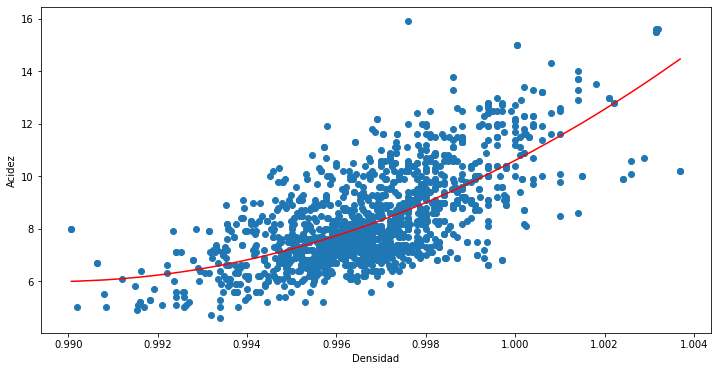

In [21]:
acidity_pred = polymodel.predict(x_poly)

fig = plt.figure(figsize=(12, 6))
plt.scatter(df['density'], df['fixed acidity'])
plt.plot(df['density'], acidity_pred, color='red')
plt.xlabel('Densidad')
plt.ylabel('Acidez')
plt.show()

La línea de regresión, al estar representada ahora con una curva, se acopla mejor a los datos.

Ahora analicemos qué error tenemos en este caso.

In [22]:
print(
    "MSE: "
    + str(metrics.mean_squared_error(df['fixed acidity'], acidity_pred, squared=True))
)

MSE: 1.609772570758684


In [23]:
print(
    "RMSE: "
    + str(metrics.mean_squared_error(df['fixed acidity'], acidity_pred, squared=False))
)

RMSE: 1.2687681312039187


El error decreció, lo cual es bueno, veamos ahora el grafico de residuos para analizar si los supuestos se ajustan mejor

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

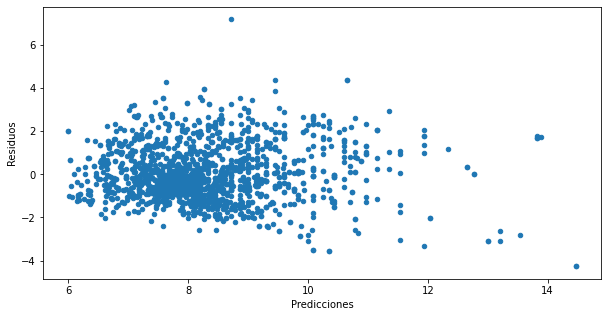

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame(
    {"Predicciones": acidity_pred.reshape(1599), "true": df['fixed acidity']}
)
preds["Residuos"] = preds["true"] - preds["Predicciones"]
preds.plot(x="Predicciones", y="Residuos", kind="scatter")

El gráfico no logra superar al que obtuvimos con regresión lineal simple. La nube de puntos no está distribuida uniformemente. Muestra una agrupación en el centro, como en el caso de regresión simple, pero también presenta valores más alejados que resultan en una nube menos equilibrada.

Ahora probamos con un polinomio de grado 3

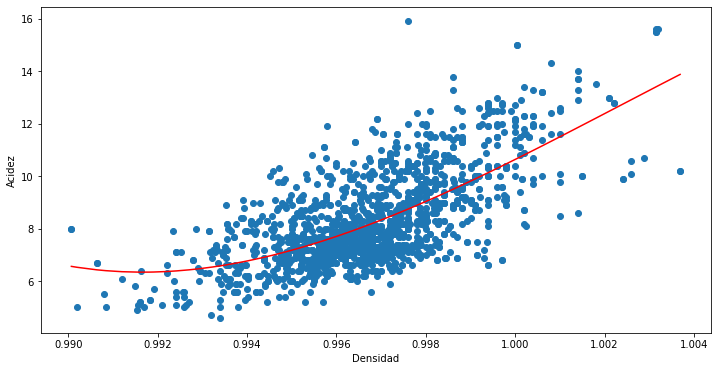

In [25]:
polynomial_features = PolynomialFeatures(degree=3)

df = df.sort_values(by=['density'])
x_poly_3 = polynomial_features.fit_transform(df['density'].values.reshape(-1, 1))
polymodel_3 = LinearRegression()
polymodel_3.fit(x_poly_3, df['fixed acidity'].values.reshape(-1, 1))
acidity_poly_pred = polymodel_3.predict(x_poly_3)

fig = plt.figure(figsize=(12, 6))
plt.scatter(df['density'], df['fixed acidity'])
plt.plot(df['density'], acidity_poly_pred, color='red')
plt.xlabel('Densidad')
plt.ylabel('Acidez')
plt.show()

La curva se ajusta aún más a los datos.

#### ¿Que sucede si aumentamos mucho el grado del polinomio?

Recordemos que para tener medidas realistas de nuestros modelos es necesario, evaluar el error sobre <b>datos no usados en el entrenamiento</b>.

Así que utilizaremos de nuevo k-fold cross validation, para lograr medidas mas realistas de cada tipo de regresión.


In [26]:
def rmse_cv(model, X_train, y_train):
    rmse = np.sqrt(
        -cross_val_score(
            model, X_train, y_train, scoring="neg_mean_squared_error", cv=5
        )
    )
    return rmse.mean()

In [27]:
errors = []
for i in range(1, 31):
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(
        df['fixed acidity'].values.reshape(-1, 1)
    )
    y = df['density'].values.reshape(-1, 1)
    regressions = LinearRegression()
    errors.append(rmse_cv(regressions, x_poly, y))

<AxesSubplot:xlabel='grado'>

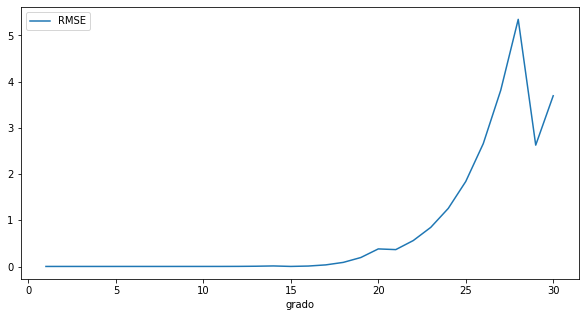

In [28]:
errores = pd.DataFrame({"grado": range(1, 31), "RMSE": errors[0:30]})
errores.plot(x="grado", y="RMSE")

Aumentar el grado del polinomio no es sinónimo de mayor precisión en los resultados. En la curva de RMSE por grado de polinomio encontramos que a partir del grado 15 el error comienza a aumentar considerablemente, para luego sufrir cambios más abruptos a partir del grado 27 aproximadamente.

In [29]:
errors

[0.0016287606867828974,
 0.001778781693026579,
 0.0017358740104120962,
 0.0016857471682919663,
 0.0017283971309471693,
 0.0017753135694029167,
 0.0016678811346569921,
 0.0016927219702479348,
 0.0018834869182303509,
 0.0018606653336429037,
 0.0020710497475066097,
 0.0031894149286880113,
 0.006223200680749925,
 0.012447929673565701,
 0.0021806466445913795,
 0.01025433507976298,
 0.035473353146226023,
 0.08951433454910948,
 0.19445642046078185,
 0.3808771153747269,
 0.36594888890922384,
 0.5619239912726377,
 0.8473100959220918,
 1.257306797243691,
 1.8394853494843162,
 2.657208785192865,
 3.813523278821516,
 5.347384202470829,
 2.6263193851803157,
 3.694027517027107]

### Regresión Lineal Múltiple


Ahora vamos a armar una regresión con más de una variable. Para esto, vamos a predecir la calidad del vino a través de varias variables que nos brinda el dataset original. La calidad se determina por un puntaje de 0 a 10.

In [30]:
dataset = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=14G9ZOBJcVVT0d3ozPRNQBOZUr_qL-iXk'
)

In [31]:
dataset.shape

(1599, 12)

In [32]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
# Dividimos los datos en atributos y labels
X_dataset = dataset[
    [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol',
    ]
]
X = X_dataset.values
y = dataset['quality'].values

Separamos nuestros datos en set de entrenamiento (80%) y set de test (holdout) (20%)

In [34]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    X, y, test_size=0.2, random_state=0
)

Entrenamos el modelo.

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como en este caso tenemos múltiples variables, la regresión debe encontrar los coeficientes óptimos para cada atributo.

In [36]:
# Visualizamos los coeficientes determinados por nuestro modelo
coeff_df = pd.DataFrame(regressor.coef_, X_dataset.columns, columns=['Coeficiente'])
coeff_df

,Coeficiente
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


Estos resultados nos indican, por ejemplo, que al incrementar 1 unidad de densidad (density) se disminuye en 31.52 unidades la calidad del vino.

In [37]:
# Ahora realizamos nuestra predicción de calidad del vino
y_pred = regressor.predict(X_holdout)

In [38]:
# Observamos la diferencia entre lo predicho y los valores reales
df = pd.DataFrame({'Actual': y_holdout, 'Predicción': y_pred})
df1 = df.head(25)
df1

,Actual,Predicción
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


In [39]:
# Analizamos el error de nuestro modelo
print('MSE:', metrics.mean_squared_error(y_holdout, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_holdout, y_pred)))

MSE: 0.3844711978201226
RMSE: 0.6200574149384254


### Gráfico de Residuos vs Predichos

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

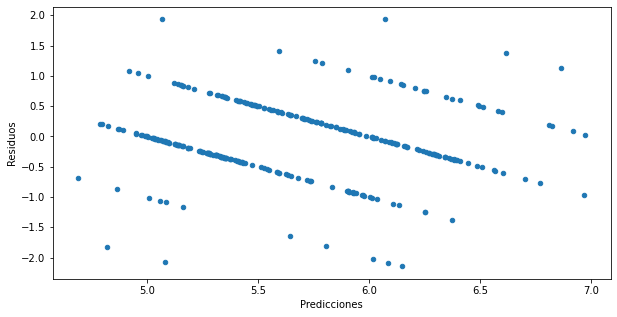

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame({"Predicciones": y_pred, "true": y_holdout})
preds["Residuos"] = preds["true"] - preds["Predicciones"]
preds.plot(x="Predicciones", y="Residuos", kind="scatter")

Vemos que no es una nube de puntos sin estructura, sino que existen ciertos patrones. Esto nos dice que existen correlaciones entre residuos y predichos. Tal vez existe un mejor modelo para predecir la variable target que la regresión lineal múltiple que utilizamos.